In [1]:
# Network-x imports
from networkx.readwrite.graphml import read_graphml
import networkx as nx

# Graph Kernels import
from grakel.utils import graph_from_networkx
from grakel.kernels import WeisfeilerLehman, VertexHistogram, ShortestPath, RandomWalk, SubgraphMatching, NeighborhoodHash, GraphletSampling, PyramidMatch, SvmTheta

# SVM imports
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

# general imports
import os

/home/suraj/apps/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.lfw module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Data Preprocessing

## Data Loading

In [22]:
graphs = list()
labels = list()
tags = {'All': 0, 'SS': 1}

for algo in os.listdir('CFG/Path/'):
    count = 1
    for file in os.listdir('CFG/Path/'+algo):
        print(file)
        graphs.append(read_graphml('CFG/Path/'+algo+'/'+file))
        labels.append(tags[algo])
        if(count == 700):
            break
        count += 1

ss5319995.graphml
ss1583626.graphml
ss4799582.graphml
ss2651919.graphml
ss4351072.graphml
ss3873055.graphml
ss4463227.graphml
ss3176261.graphml
ss5012200.graphml
ss4249645.graphml
ss4494600.graphml
ss1417084.graphml
ss1922757.graphml
ss4161005.graphml
ss4626904.graphml
ss4633150.graphml
ss3945711.graphml
ss1823603.graphml
ss4920406.graphml
ss5361975.graphml
ss3146372.graphml
ss3966283.graphml
ss2735050.graphml
ss2548559.graphml
ss3127192.graphml
ss3772478.graphml
ss3422512.graphml
ss3806332.graphml
ss2762273.graphml
ss4664722.graphml
ss1580106.graphml
ss4360838.graphml
ss2110438.graphml
ss1136297.graphml
ss5282168.graphml
ss1803162.graphml
ss4380190.graphml
ss4359696.graphml
ss3690374.graphml
ss1671857.graphml
ss4704646.graphml
ss2003624.graphml
ss4209154.graphml
ss2875336.graphml
ss4116921.graphml
ss4219309.graphml
ss1946159.graphml
ss2700695.graphml
ss4166815.graphml
ss3073727.graphml
ss4752021.graphml
ss2637428.graphml
ss2637059.graphml
ss4336975.graphml
ss4204019.graphml
ss3822073.

ss2890165.graphml
ss2121496.graphml
ss4807552.graphml
ss5265250.graphml
ss1398560.graphml
ss4680213.graphml
ss4307128.graphml
ss3706565.graphml
ss3836824.graphml
ss4383589.graphml
ss1604369.graphml
ss5217000.graphml
ss3813948.graphml
ss2771632.graphml
ss4483557.graphml
ss2634855.graphml
ss2862341.graphml
ss3808056.graphml
ss4460823.graphml
ss4803296.graphml
ss4257555.graphml
ss4498104.graphml
ss1713396.graphml
ss1019496.graphml
ss3827203.graphml
ss3009140.graphml
ss2497546.graphml
ss4039517.graphml
ss2644630.graphml
ss4324707.graphml
ss4799161.graphml
ss4419811.graphml
all4780468.graphml
all4630776.graphml
all5341796.graphml
all3920367.graphml
all3357278.graphml
all4062620.graphml
all3926538.graphml
all3530215.graphml
all4331576.graphml
all1528479.graphml
all4222620.graphml
all2747483.graphml
all4061798.graphml
all3813536.graphml
all4864093.graphml
all2267578.graphml
all4091277.graphml
all4120439.graphml
all1686163.graphml
all1714936.graphml
all4079175.graphml
all2010250.graphml
all461

all4203378.graphml
all3144101.graphml
all3704578.graphml
all2205109.graphml
all4482081.graphml
all5514490.graphml
all3835510.graphml
all4492892.graphml
all1007290.graphml
all1942456.graphml
all4691989.graphml
all5248057.graphml
all3429972.graphml
all4380348.graphml
all4265794.graphml
all1841499.graphml
all3704372.graphml
all4472025.graphml
all1773188.graphml
all4453094.graphml
all1811513.graphml
all4103802.graphml
all4205295.graphml
all4115632.graphml
all1587624.graphml
all4630974.graphml
all5257787.graphml
all4626861.graphml
all1960134.graphml
all4324165.graphml
all3906532.graphml
all1841195.graphml
all2885816.graphml
all3866521.graphml
all4118936.graphml
all4595371.graphml
all1018902.graphml
all4874698.graphml
all4481106.graphml
all4750402.graphml
all4331986.graphml
all3635183.graphml
all2544668.graphml
all2796320.graphml
all4511299.graphml
all3176333.graphml
all1728118.graphml
all4372601.graphml
all4305496.graphml
all4404889.graphml
all3748674.graphml
all3727793.graphml
all4108268.g

In [23]:
len(graphs), len(labels)

(1400, 1400)

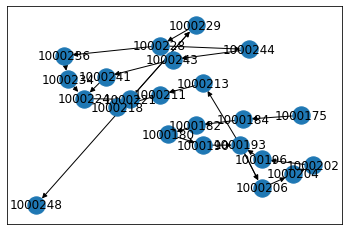

In [24]:
nx.draw_networkx(graphs[0])

In [25]:
G_train, G_test, Y_train, Y_test = train_test_split(graphs, labels, test_size=0.20, random_state=42)
len(G_train), len(G_test), len(Y_train), len(Y_test)

(1120, 280, 1120, 280)

## Convert Network-X Graph to Adj List Representation of GraKel

In [26]:
G_train = list(graph_from_networkx(G_train, node_labels_tag='label'))
G_test = list(graph_from_networkx(G_test, node_labels_tag='label'))

In [27]:
G_train[0]

[{'1000177': {'1000181': 1.0},
  '1000179': {'1000186': 1.0},
  '1000181': {'1000179': 1.0},
  '1000186': {'1000191': 1.0, '1000199': 1.0},
  '1000189': {'1000212': 1.0},
  '1000190': {'1000189': 1.0},
  '1000191': {'1000190': 1.0},
  '1000197': {'1000212': 1.0},
  '1000198': {'1000197': 1.0},
  '1000199': {'1000198': 1.0},
  '1000208': {'1000217': 1.0},
  '1000210': {'1000208': 1.0},
  '1000212': {'1000210': 1.0},
  '1000215': {'1000222': 1.0},
  '1000216': {'1000215': 1.0},
  '1000217': {'1000216': 1.0},
  '1000222': {'1000227': 1.0},
  '1000225': {'1000235': 1.0, '1000244': 1.0, '1000250': 1.0},
  '1000226': {'1000225': 1.0},
  '1000227': {'1000226': 1.0},
  '1000233': {'1000238': 1.0},
  '1000235': {'1000233': 1.0},
  '1000238': {'1000271': 1.0},
  '1000244': {'1000250': 1.0},
  '1000248': {'1000255': 1.0, '1000262': 1.0},
  '1000249': {'1000248': 1.0},
  '1000250': {'1000249': 1.0},
  '1000255': {'1000266': 1.0},
  '1000259': {'1000266': 1.0},
  '1000261': {'1000259': 1.0},
  '100

# Kernel Computation & SVM

## 1. Compute the Weisfeiler Lehman Kernel

In [28]:
# Initialize a Weisfeiler-Lehman subtree kernel
gk = WeisfeilerLehman()

In [29]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

In [30]:
K_train

array([[260,   7,  11, ...,  24,   9,  39],
       [  7, 174,   0, ...,  15,  20,   7],
       [ 11,   0, 368, ...,   0,   0,   0],
       ...,
       [ 24,  15,   0, ..., 448,  69,  13],
       [  9,  20,   0, ...,  69, 558,   6],
       [ 39,   7,   0, ...,  13,   6, 448]], dtype=int64)

In [31]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
# Test classifier
Y_pred = clf.predict(K_test)

In [14]:
# Analysis
count = 0
for i in range(len(Y_test)):
    if Y_test[i] != Y_pred[i]:
        count += 1
        print(i+1, Y_test[i], Y_pred[i])
print(count)

11 0 1
13 1 0
21 2 3
22 0 1
31 1 2
32 0 1
33 3 2
41 3 2
49 1 0
51 3 0
58 1 0
60 0 1
71 0 1
72 0 1
95 2 3
96 1 0
101 1 2
102 1 0
104 3 0
106 0 1
117 1 0
124 2 0
130 0 1
133 1 0
141 0 1
145 2 3
147 0 1
159 1 0
161 1 0
162 0 1
173 0 1
180 2 3
181 0 1
186 0 1
194 1 0
196 0 3
199 0 1
200 1 0
201 2 0
211 2 3
233 1 0
244 2 3
250 3 2
254 1 0
271 0 1
273 3 2
278 1 2
299 0 1
315 0 1
316 1 0
318 2 3
323 2 3
329 3 2
341 3 2
343 0 1
344 2 0
353 3 2
362 0 1
363 3 2
370 0 1
377 3 2
384 3 2
386 0 1
406 0 1
407 1 2
424 1 0
438 3 2
443 3 2
465 2 3
483 1 0
484 0 1
493 1 2
497 0 1
498 1 0
532 0 1
533 2 3
76


In [15]:
# Kernel Matrix
K_test.shape

(534, 2136)

In [16]:
graphs1 = list()
labels1 = list()
tags = {'Bubble': 0, 'Insertion': 1, 'Selection': 2, 'Counting': 3, 'Merge': 4, 'Quick': 5}

for algo in os.listdir('CFG'):
    count = 1
    for file in os.listdir('CFG/'+algo):
        graphs1.append(read_graphml('CFG/'+algo+'/'+file))
        labels1.append([tags[algo], file])
        if(count == 700):
            break
        count += 1

IsADirectoryError: [Errno 21] Is a directory: 'CFG/Searching/Linear'

In [16]:
G_train1, G_test1, Y_train1, Y_test1 = train_test_split(graphs1, labels1, test_size=0.20, random_state=42)
len(G_train1), len(G_test1), len(Y_train1), len(Y_test1)

(3360, 840, 3360, 840)

In [17]:
# Analysis
r_tags = {0: 'Bubble', 1: 'Insertion', 2: 'Selection', 3:'Counting', 4: 'Merge', 5: 'Quick'}
count = 0
for i in range(len(Y_test)):
    if Y_test[i] != Y_pred[i]:
        count += 1
        print(i+1, Y_test1[i], [Y_pred[i], r_tags[Y_pred[i]]])
print(count)

10 [3, 'counting1979559.graphml'] [4, 'Merge']
15 [1, 'insertion3893366.graphml'] [0, 'Bubble']
17 [4, 'merge1515388.graphml'] [2, 'Selection']
18 [2, 'selection2272079.graphml'] [4, 'Merge']
23 [5, 'quick672841.graphml'] [4, 'Merge']
56 [2, 'selection3895884.graphml'] [1, 'Insertion']
59 [5, 'quick2856923.graphml'] [4, 'Merge']
83 [3, 'counting3955982.graphml'] [4, 'Merge']
85 [2, 'selection4158811.graphml'] [4, 'Merge']
93 [4, 'merge3750272.graphml'] [5, 'Quick']
109 [0, 'bubble3275457.graphml'] [1, 'Insertion']
115 [2, 'selection3246904.graphml'] [1, 'Insertion']
123 [4, 'merge2128156.graphml'] [2, 'Selection']
125 [2, 'selection4034930.graphml'] [4, 'Merge']
140 [1, 'insertion910198.graphml'] [0, 'Bubble']
144 [0, 'bubble1896879.graphml'] [4, 'Merge']
148 [1, 'insertion2998924.graphml'] [5, 'Quick']
149 [2, 'selection3855765.graphml'] [0, 'Bubble']
152 [2, 'selection4659872.graphml'] [0, 'Bubble']
156 [4, 'merge4029017.graphml'] [5, 'Quick']
161 [5, 'quick4616656.graphml'] [4, 'Mer

In [33]:
# Evaluate the predictions
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.85


In [34]:
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=2))

[[102  38]
 [  4 136]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       140
           1       0.78      0.97      0.87       140

    accuracy                           0.85       280
   macro avg       0.87      0.85      0.85       280
weighted avg       0.87      0.85      0.85       280



In [19]:
K_train.shape

(2136, 2136)

## 2. The random walk kernel class (Time Consuming)

In [35]:
gk = RandomWalk()

In [36]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

In [37]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
# Test classifier
Y_pred = clf.predict(K_test)

In [39]:
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=2))

[[ 89  51]
 [ 19 121]]
              precision    recall  f1-score   support

           0       0.82      0.64      0.72       140
           1       0.70      0.86      0.78       140

    accuracy                           0.75       280
   macro avg       0.76      0.75      0.75       280
weighted avg       0.76      0.75      0.75       280



## 3. Subgraph Matching

In [40]:
gk = SubgraphMatching(ke=None)

In [41]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

In [42]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
# Test classifier
Y_pred = clf.predict(K_test)

In [44]:
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=2))

[[103  37]
 [  2 138]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       140
           1       0.79      0.99      0.88       140

    accuracy                           0.86       280
   macro avg       0.88      0.86      0.86       280
weighted avg       0.88      0.86      0.86       280



## 4. NeighborhoodHash Kernel

In [45]:
gk = NeighborhoodHash()

In [46]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

/home/suraj/apps/anaconda3/lib/python3.7/site-packages/grakel-0.1b7-py3.7-linux-x86_64.egg/grakel/kernels/neighborhood_hash.py:170: UserWarning: Number of labels is smaller thanthe biggest possible.. Collisions will appear on the new labels.
  warnings.warn('Number of labels is smaller than'


In [47]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [48]:
# Test classifier
Y_pred = clf.predict(K_test)

In [49]:
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=2))

[[ 97  43]
 [  2 138]]
              precision    recall  f1-score   support

           0       0.98      0.69      0.81       140
           1       0.76      0.99      0.86       140

    accuracy                           0.84       280
   macro avg       0.87      0.84      0.84       280
weighted avg       0.87      0.84      0.84       280



## 5.  GraphletSampling Kernel

In [50]:
gk = GraphletSampling()

In [51]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

In [52]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [53]:
# Test classifier
Y_pred = clf.predict(K_test)

In [54]:
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=2))

[[ 95  45]
 [ 10 130]]
              precision    recall  f1-score   support

           0       0.90      0.68      0.78       140
           1       0.74      0.93      0.83       140

    accuracy                           0.80       280
   macro avg       0.82      0.80      0.80       280
weighted avg       0.82      0.80      0.80       280



## 6. SvmTheta Match

In [111]:
gk = SvmTheta()

In [ ]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

In [ ]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 